### Import Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Built-In Funtions 

### Convert RGB images to grayscale

In [2]:
def rgb_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Design a 3x3 convolution and correlation filter for this dataset.

In [3]:
def convolution_filter(img):
    kernel = np.array([[1, 1, 1],
                       [1, 1, 1],
                       [1, 1, 1]]) / 9
    return cv2.filter2D(img, -1, kernel)

### Design 1st order derivative and 2nd Order derivative filter and apply on input images.

In [4]:
def derivative_filters(img):
    dx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    dxx = cv2.Sobel(img, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(img, cv2.CV_64F, 0, 2, ksize=3)
    return dx, dy, dxx, dyy

### Identify the type of noise (Gaussian or Salt and Pepper) in images.

In [5]:
def detect_noise(img):
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    var = np.var(img - blurred)
    if var < 100:
        return "Salt and Pepper Noise"
    else:
        return "Gaussian Noise"

### Based on your assumption apply relative filter on input images to remove the noise.

In [6]:
def remove_noise(img, noise_type):
    if noise_type == "Salt and Pepper Noise":
        return cv2.medianBlur(img, 5)
    else:
        return cv2.GaussianBlur(img, (5, 5), 0)

### Implement Laplacian edge detection on your dataset.

In [7]:
def laplacian_edge_detection(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    return laplacian

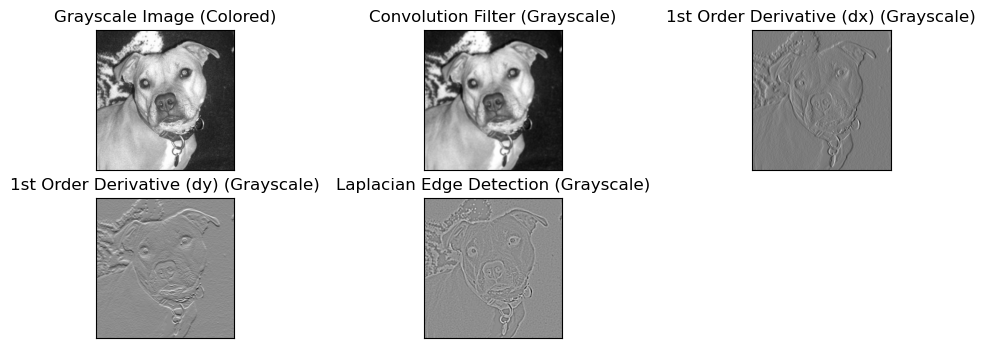

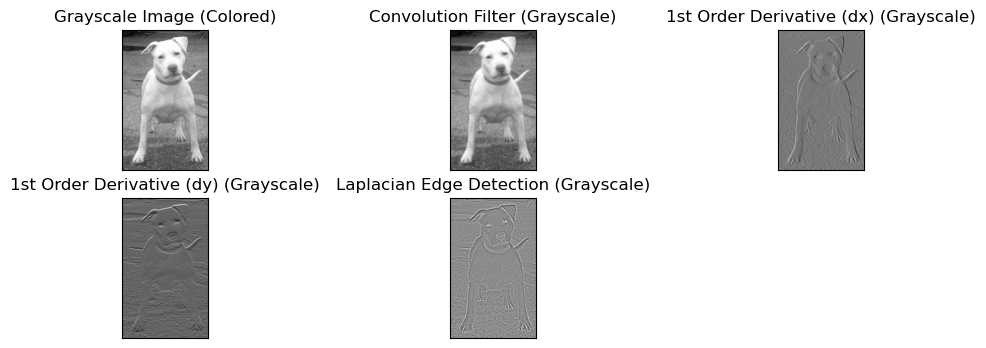

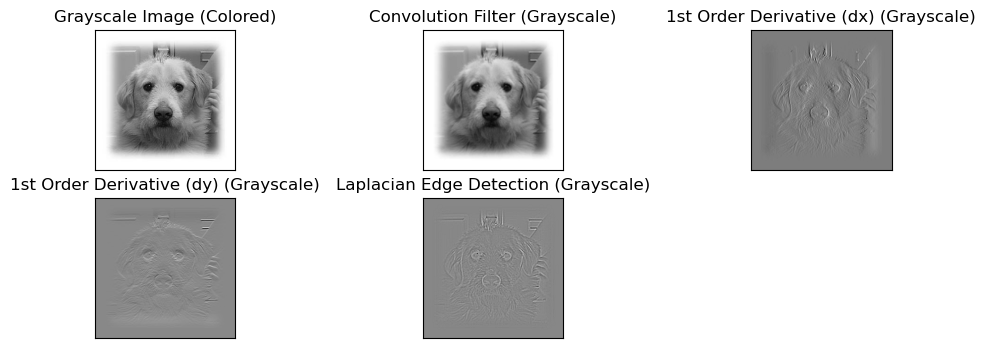

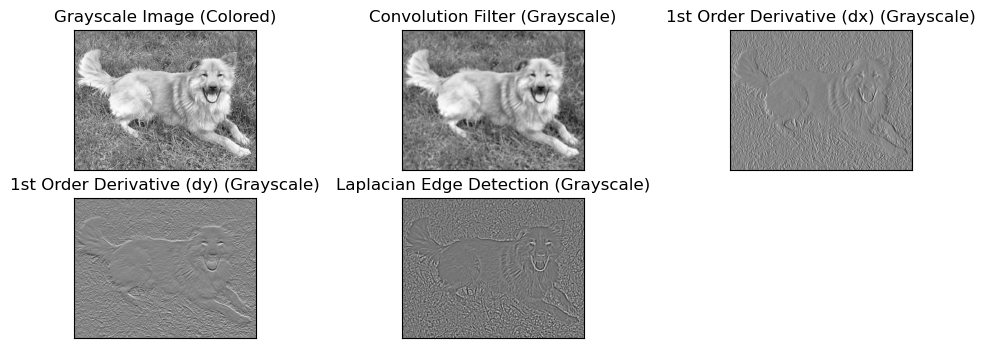

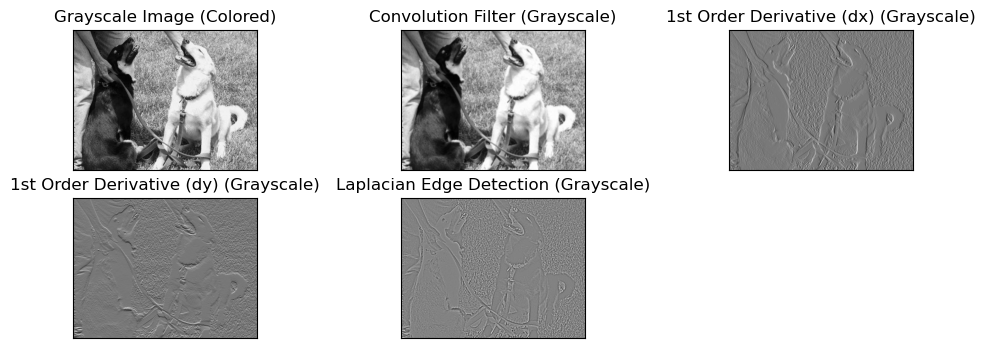

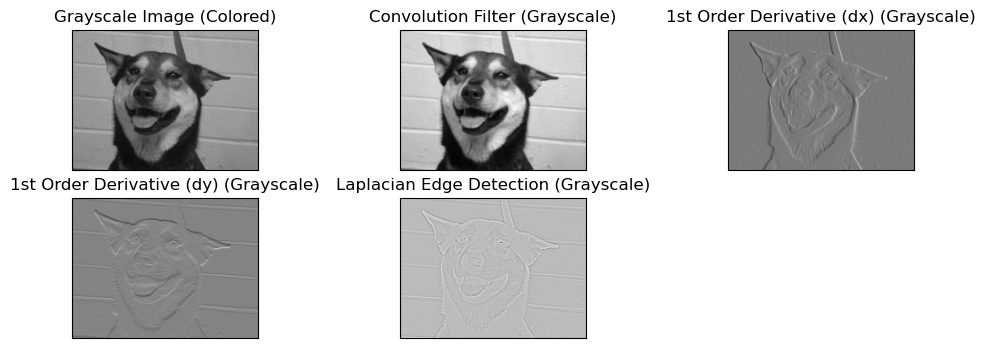

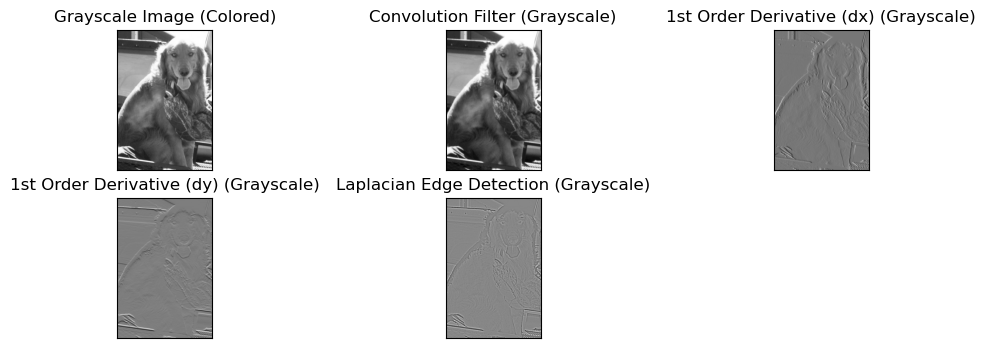

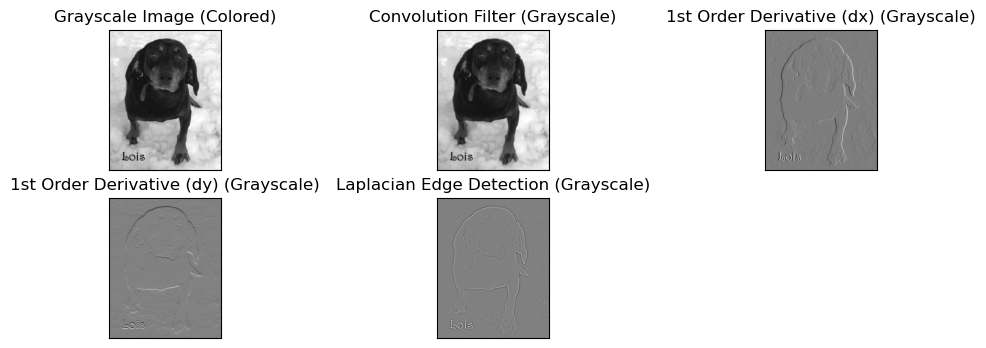

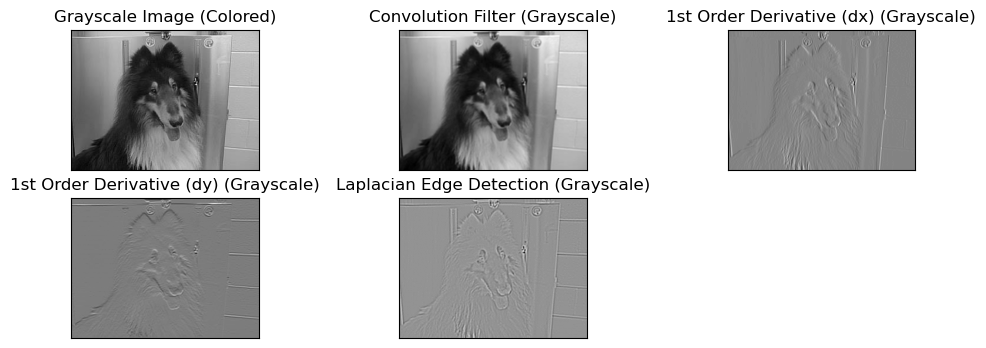

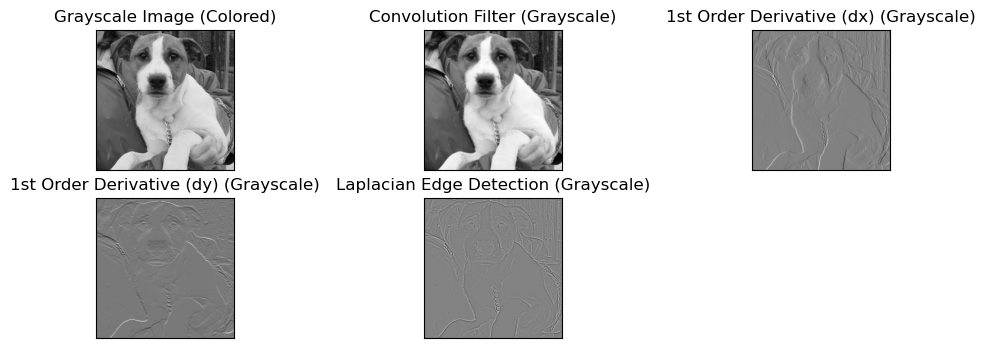

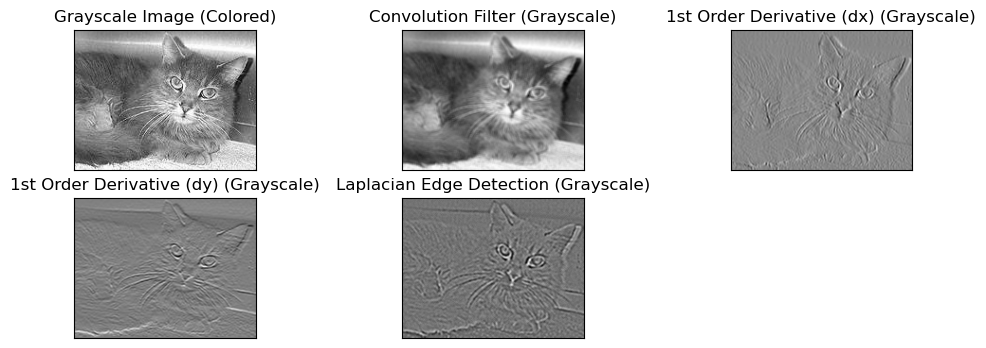

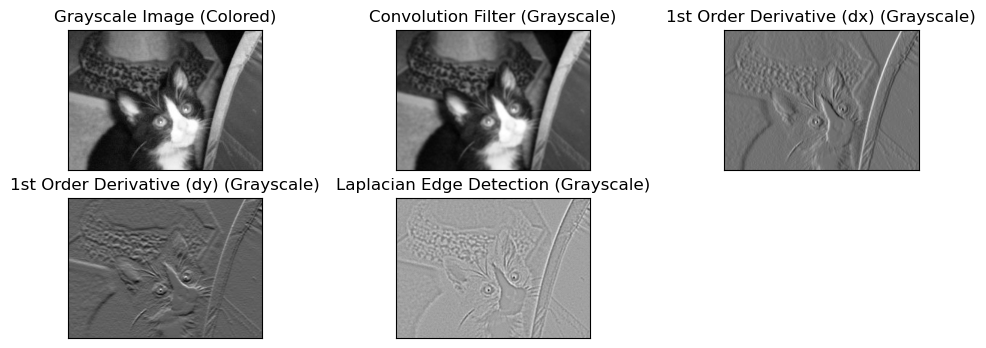

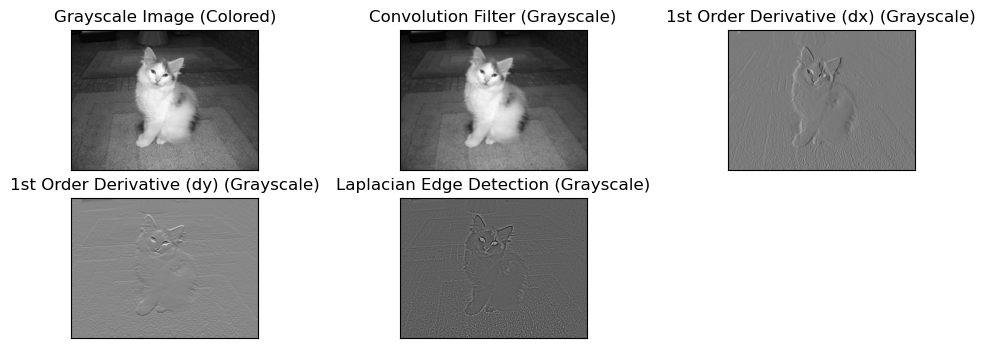

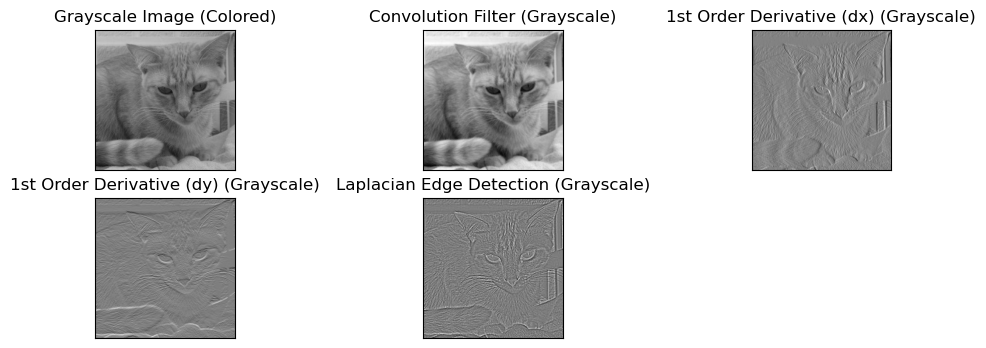

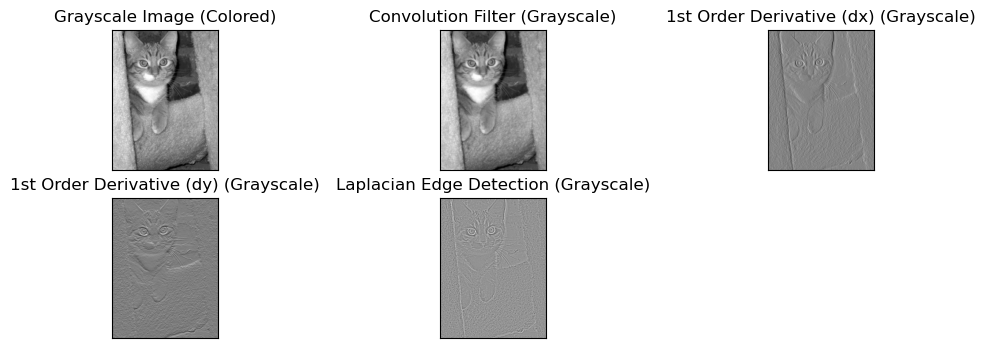

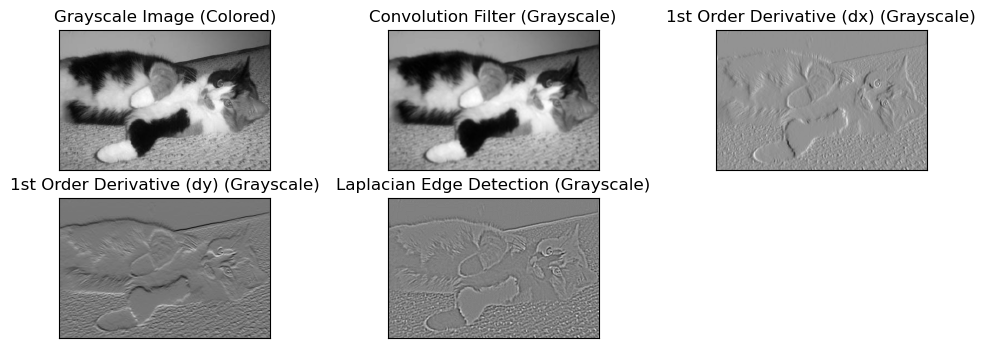

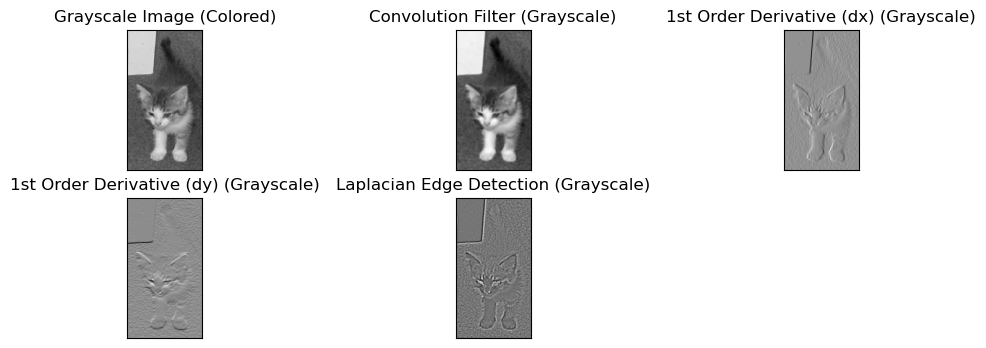

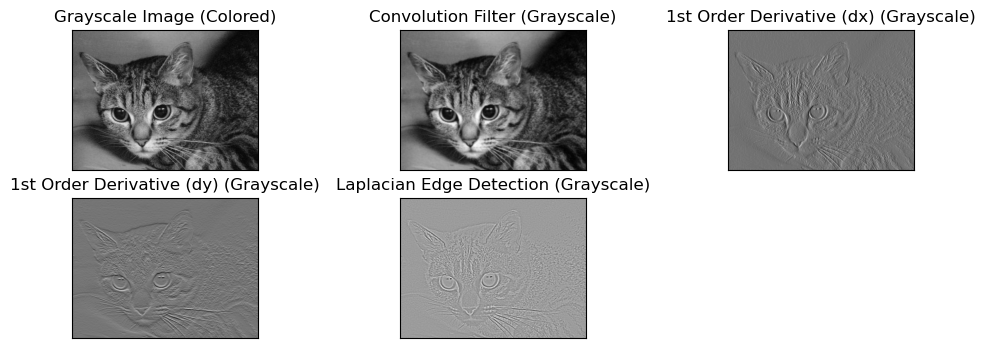

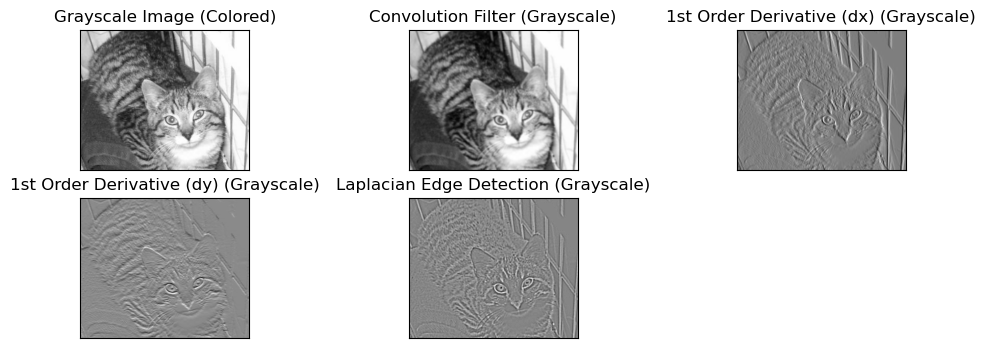

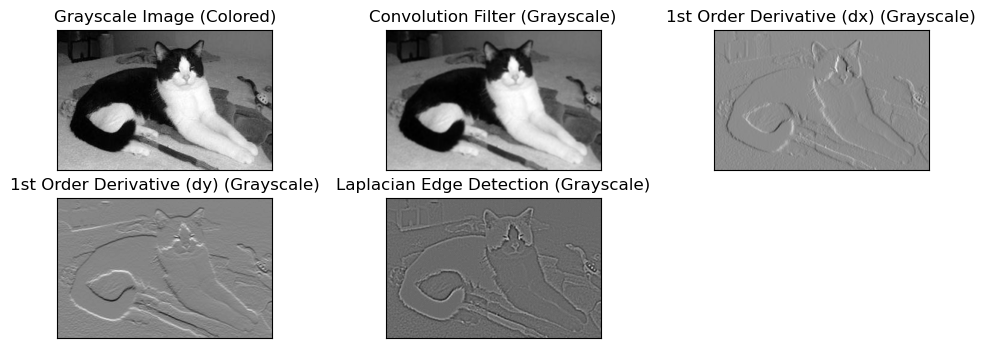

In [8]:
image_folder = "Downloads/DAV Assignment 2/Image Dataset"
if not os.path.exists(image_folder):
    print(f"Image folder not found at {image_folder}")
else:
    # Looping through the images
    for i in range(1, 21):
        img_path = os.path.join(image_folder, f"{i}.jpg")
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                grayscale_img = rgb_to_grayscale(img)
                convolved_img = convolution_filter(grayscale_img)
                dx, dy, dxx, dyy = derivative_filters(grayscale_img)
                noise_type = detect_noise(grayscale_img)
                denoised_img = remove_noise(grayscale_img, noise_type)
                edge_img = laplacian_edge_detection(denoised_img)
                colored_grayscale_img = cv2.cvtColor(grayscale_img, cv2.COLOR_GRAY2BGR)
                plt.figure(figsize=(12, 4))
                plt.subplot(2, 3, 1), plt.imshow(colored_grayscale_img)
                plt.title('Grayscale Image (Colored)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 2), plt.imshow(convolved_img, cmap='gray')
                plt.title('Convolution Filter (Grayscale)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 3), plt.imshow(dx, cmap='gray')
                plt.title('1st Order Derivative (dx) (Grayscale)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 4), plt.imshow(dy, cmap='gray')
                plt.title('1st Order Derivative (dy) (Grayscale)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 5), plt.imshow(edge_img, cmap='gray')
                plt.title('Laplacian Edge Detection (Grayscale)'), plt.xticks([]), plt.yticks([])
                plt.show()  
            else:
                print(f"Failed to load image {img_path}")
        else:
            print(f"Image {img_path} not found")

## User-Defined Functions

### Convert RGB images to grayscale

In [9]:
import numpy as np
def custom_rgb_to_grayscale(img):
    return 0.3 * img[:, :, 2] + 0.59 * img[:, :, 1] + 0.11 * img[:, :, 0]


### Design a 3x3 convolution and correlation filter for this dataset.

In [10]:
def custom_convolution(img, kernel):
    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    output = np.zeros_like(img)
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    for i in range(img_height):
        for j in range(img_width):
            roi = padded_img[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(roi * kernel)

    return output


### Design 1st order derivative and 2nd Order derivative filter and apply on input images.

In [11]:
def custom_derivative_filters(img):
    dx_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    dy_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    dxx_kernel = np.array([[1, -2, 1], [2, -4, 2], [1, -2, 1]])
    dyy_kernel = np.array([[1, 2, 1], [-2, -4, -2], [1, 2, 1]])

    dx = custom_convolution(img, dx_kernel)
    dy = custom_convolution(img, dy_kernel)
    dxx = custom_convolution(img, dxx_kernel)
    dyy = custom_convolution(img, dyy_kernel)

    return dx, dy, dxx, dyy


### Identify the type of noise (Gaussian or Salt and Pepper) in images.

In [12]:
def custom_detect_noise(img):
    blurred = custom_convolution(img, np.ones((5, 5)) / 25)
    var = np.var(img - blurred)
    if var < 100:
        return "Salt and Pepper Noise"
    else:
        return "Gaussian Noise"


### Based on your assumption apply relative filter on input images to remove the noise.

In [13]:
def custom_remove_noise(img, noise_type):
    if noise_type == "Salt and Pepper Noise":
        return custom_convolution(img, np.ones((5, 5)) / 25)
    else:
        return custom_convolution(img, np.ones((5, 5)) / 25)


### Implement Laplacian edge detection on your dataset.

In [14]:
def custom_laplacian_edge_detection(img):
    laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    return custom_convolution(img, laplacian_kernel)


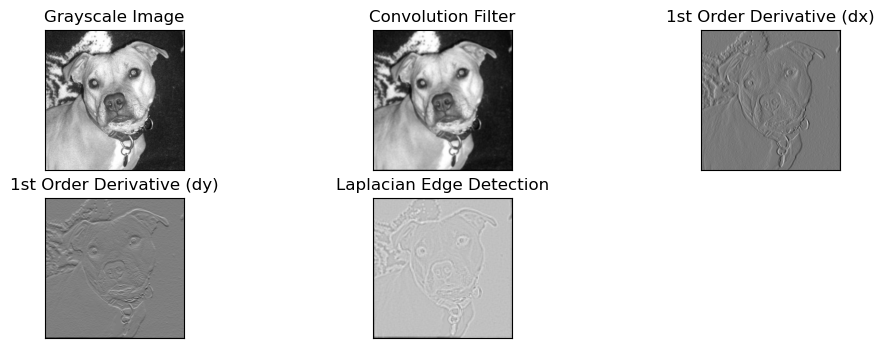

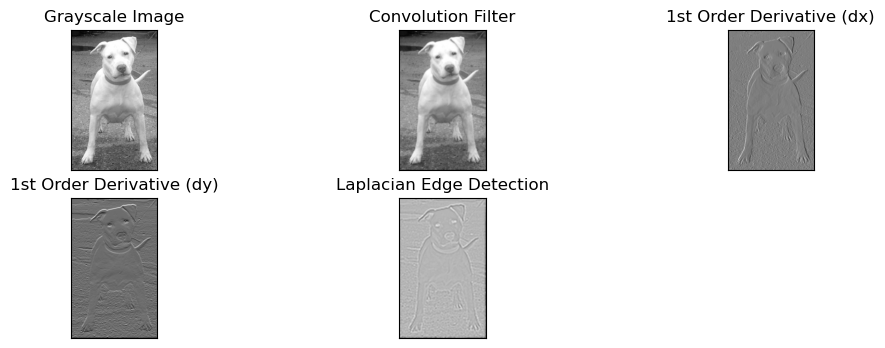

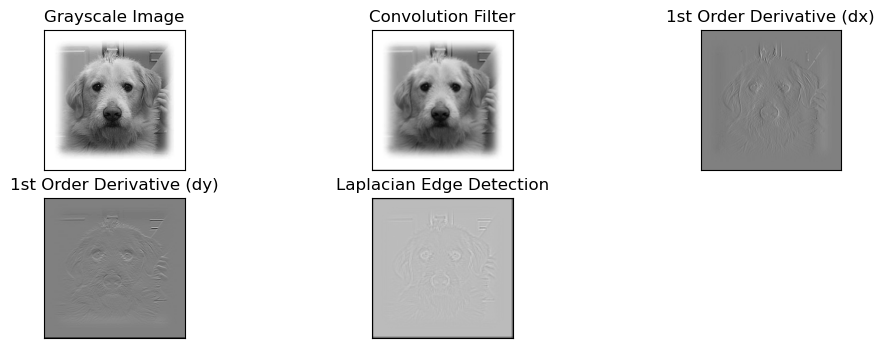

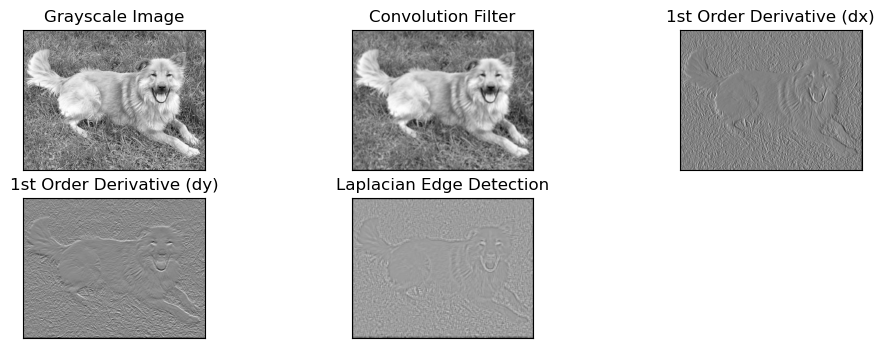

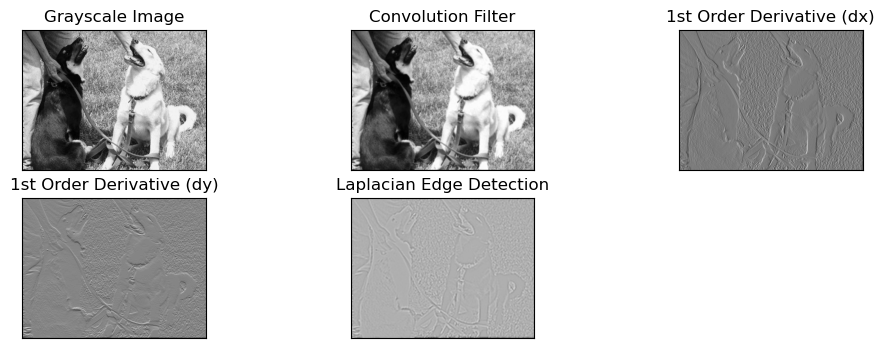

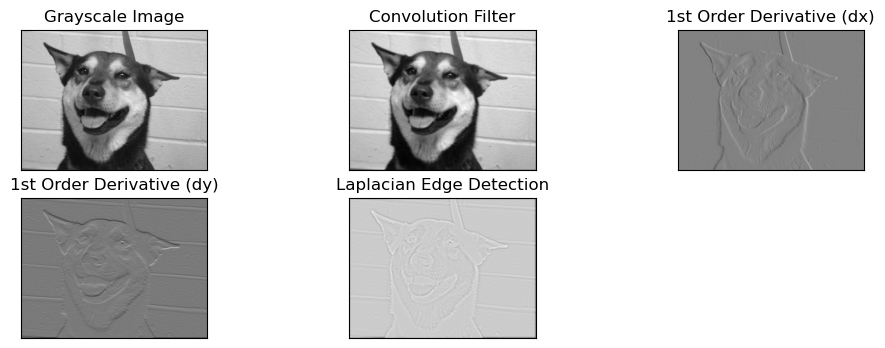

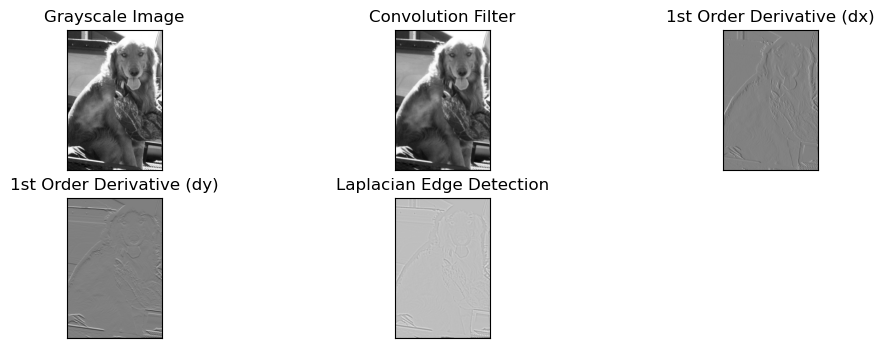

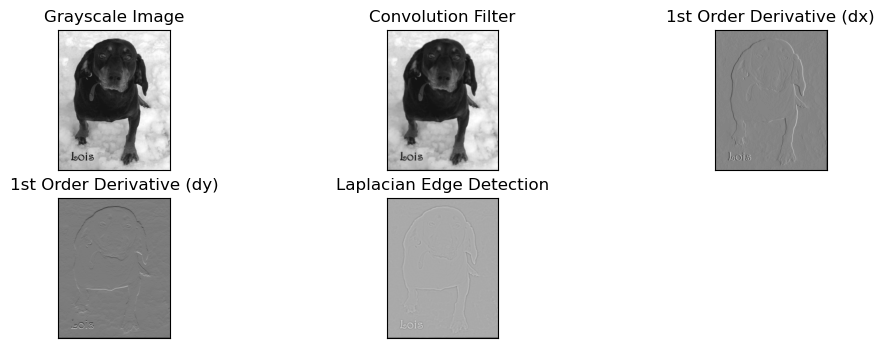

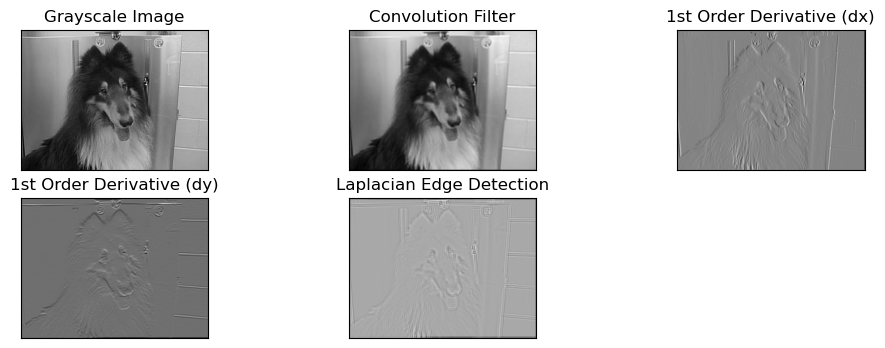

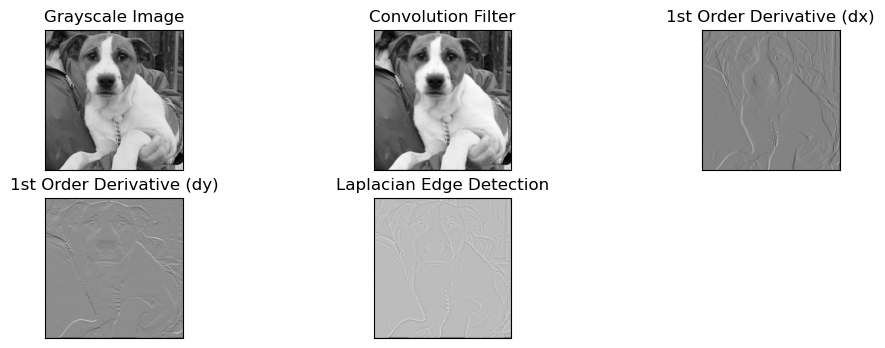

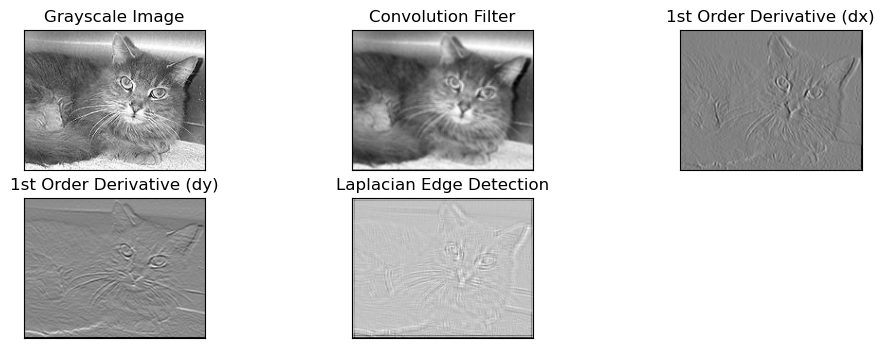

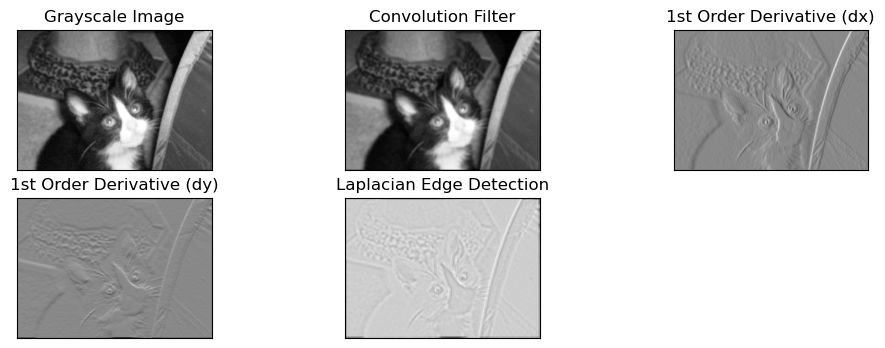

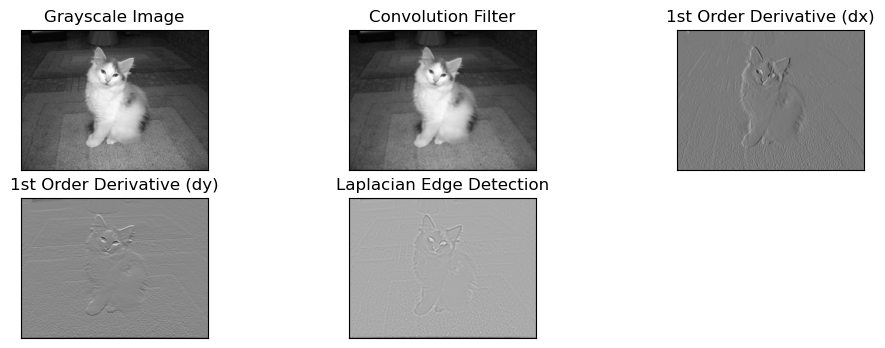

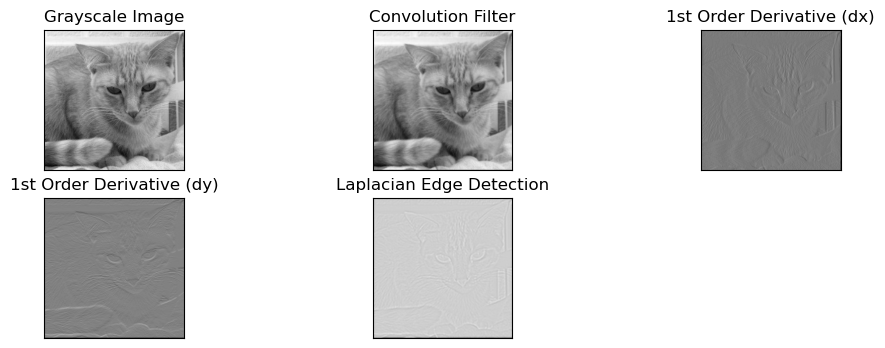

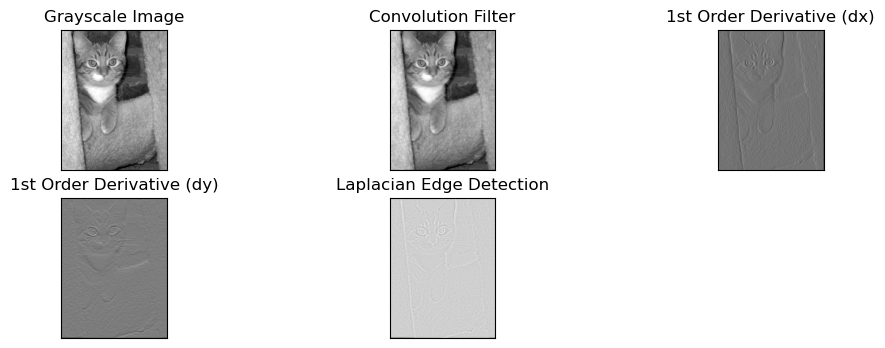

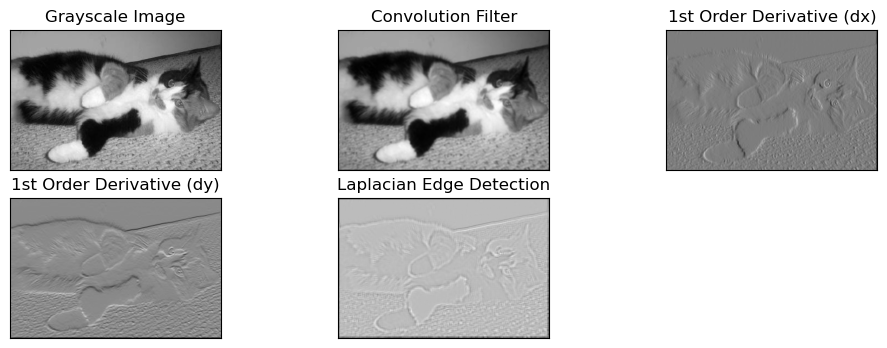

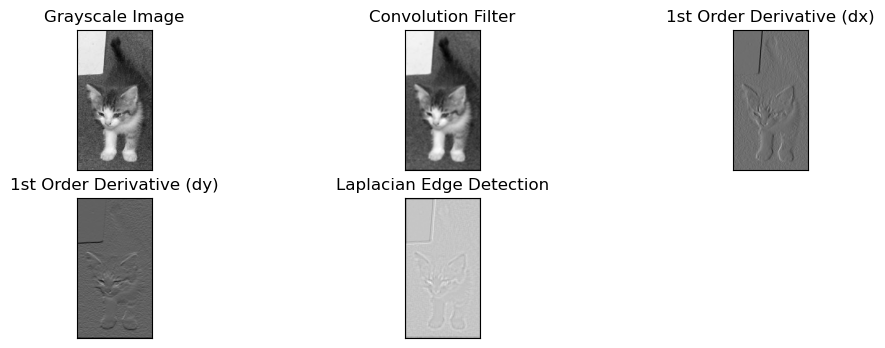

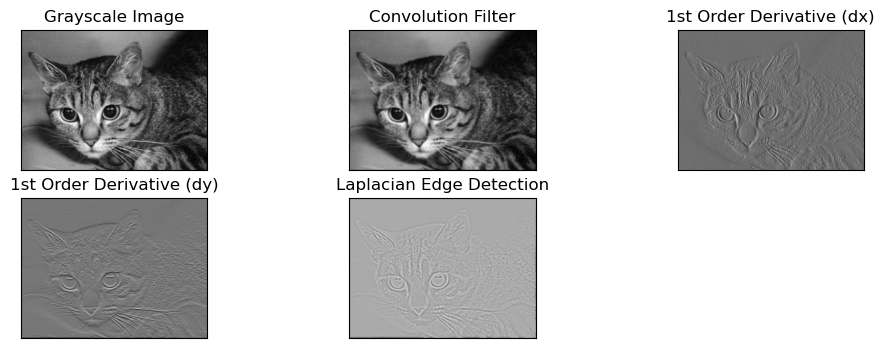

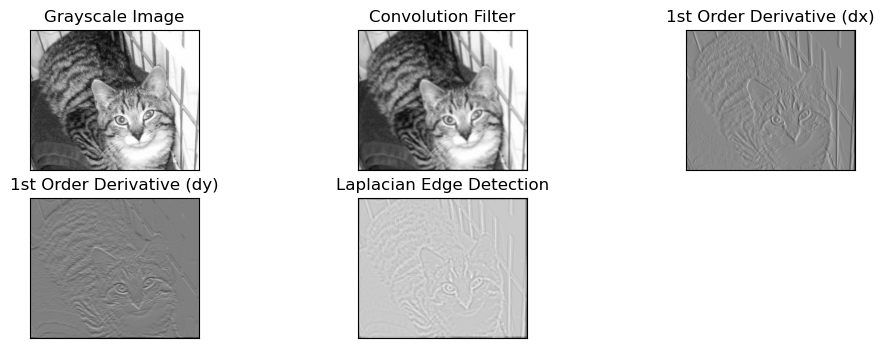

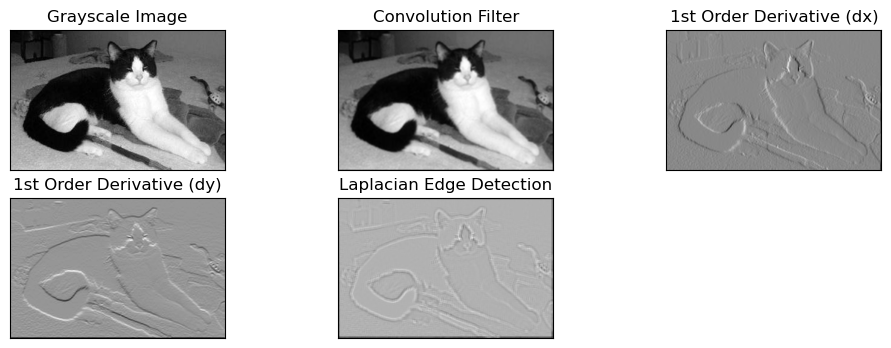

In [15]:
image_folder = "Downloads/DAV Assignment 2/Image Dataset"
if not os.path.exists(image_folder):
    print(f"Image folder not found at {image_folder}")
else:
    for i in range(1, 21):
        img_path = os.path.join(image_folder, f"{i}.jpg")
        if os.path.exists(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                grayscale_img = custom_rgb_to_grayscale(img)
                convolved_img = custom_convolution(grayscale_img, np.ones((3, 3)) / 9)
                dx, dy, dxx, dyy = custom_derivative_filters(grayscale_img)
                noise_type = custom_detect_noise(grayscale_img)
                denoised_img = custom_remove_noise(grayscale_img, noise_type)
                edge_img = custom_laplacian_edge_detection(denoised_img)
                plt.figure(figsize=(12, 4))
                plt.subplot(2, 3, 1), plt.imshow(grayscale_img, cmap='gray')
                plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 2), plt.imshow(convolved_img, cmap='gray')
                plt.title('Convolution Filter'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 3), plt.imshow(dx, cmap='gray')
                plt.title('1st Order Derivative (dx)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 4), plt.imshow(dy, cmap='gray')
                plt.title('1st Order Derivative (dy)'), plt.xticks([]), plt.yticks([])
                plt.subplot(2, 3, 5), plt.imshow(edge_img, cmap='gray')
                plt.title('Laplacian Edge Detection'), plt.xticks([]), plt.yticks([])
                plt.show()
                
            else:
                print(f"Failed to load image {img_path}")
        else:
            print(f"Image {img_path} not found")
